In [1]:
import numpy as np
import random as rd 
import scipy as s 
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\\Users\\Lenovo\\Desktop\\cleaned_autos.csv",encoding="Latin-1")

In [3]:
d=data.copy()

In [4]:
d.shape

(371524, 19)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371524 entries, 0 to 371523
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date_Crawled           371524 non-null  object
 1   name                   371524 non-null  object
 2   seller                 371524 non-null  object
 3   offer_Type             371524 non-null  object
 4   price                  371524 non-null  int64 
 5   ab_test                371524 non-null  object
 6   vechile_type           371524 non-null  object
 7   year_of_registration   371524 non-null  int64 
 8   gear_box               371524 non-null  object
 9   power_ps               371524 non-null  int64 
 10  model                  371524 non-null  object
 11  kilometer              371524 non-null  int64 
 12  month_of_registration  371524 non-null  int64 
 13  fuel_type              371524 non-null  object
 14  brand                  371524 non-null  object
 15  

In [6]:
d.describe()

,price,year_of_registration,power_ps,kilometer,month_of_registration,postal_code
count,3.715240e+05,371524.000000,371524.000000,371524.000000,371524.000000,371524.00000
mean,1.729530e+04,2004.578033,115.549039,125618.842928,5.734451,50820.49427
std,3.587973e+06,92.867097,192.140488,40112.138811,3.712423,25799.08841
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000


In [7]:
d.isnull().sum()

date_Crawled             0
name                     0
seller                   0
offer_Type               0
price                    0
ab_test                  0
vechile_type             0
year_of_registration     0
gear_box                 0
power_ps                 0
model                    0
kilometer                0
month_of_registration    0
fuel_type                0
brand                    0
not_repaired_damage      0
created_date             0
postal_code              0
last_seen                0
dtype: int64

2) can you tell me the distribution of vechicles based on year of registration with the help of a plot


Text(0, 0.5, 'Number of Vehicles')

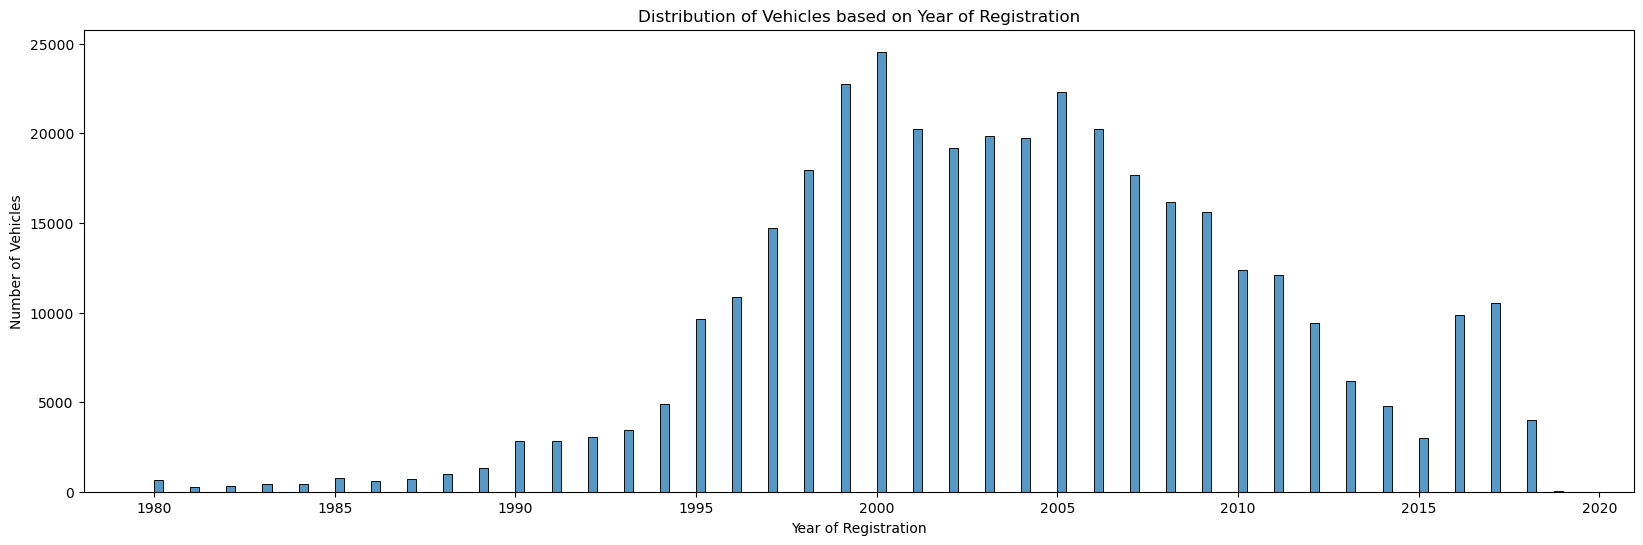

In [8]:
plt.figure(figsize=(20,6))
fil = d[(d['year_of_registration'] >= 1980) & (d['year_of_registration'] <= 2022)]
sns.histplot(data=fil,x="year_of_registration")
plt.title('Distribution of Vehicles based on Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Number of Vehicles')

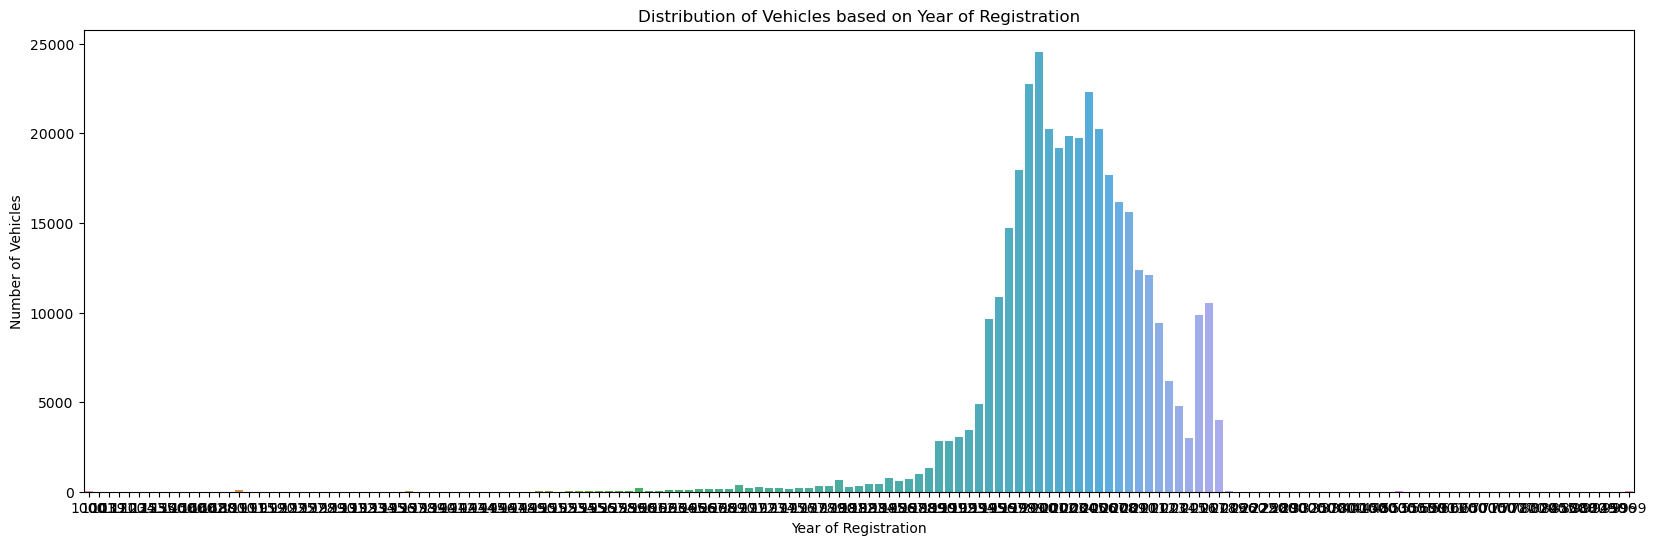

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(x=d["year_of_registration"],data=fil)
plt.title('Distribution of Vehicles based on Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Number of Vehicles')
plt.show()

3) Create a plot based on the Variation of the price range by the vehicle type

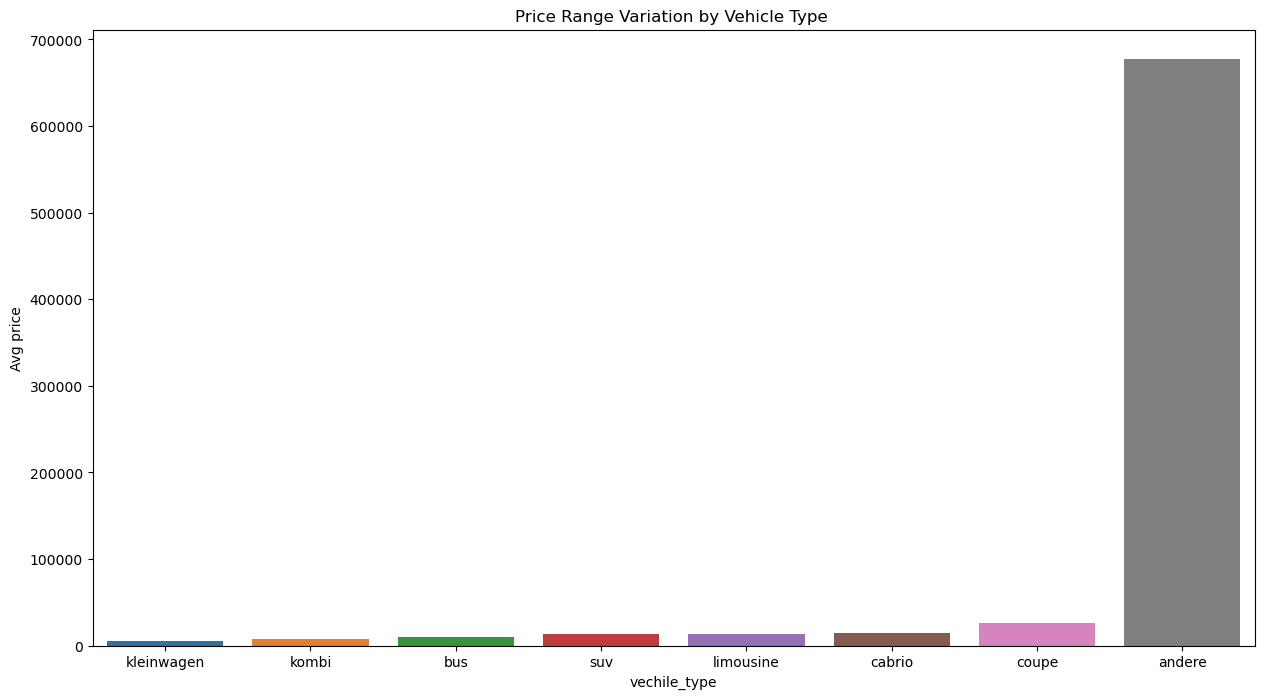

In [11]:
avg_type = d.groupby("vechile_type")["price"].mean()
avg_type = avg_type.sort_values()
plt.figure(figsize=(15,8))
sns.barplot(x=avg_type.index , y=avg_type.values)
plt.ylabel("Avg price")
plt.title("Price Range Variation by Vehicle Type ")
plt.show()

4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

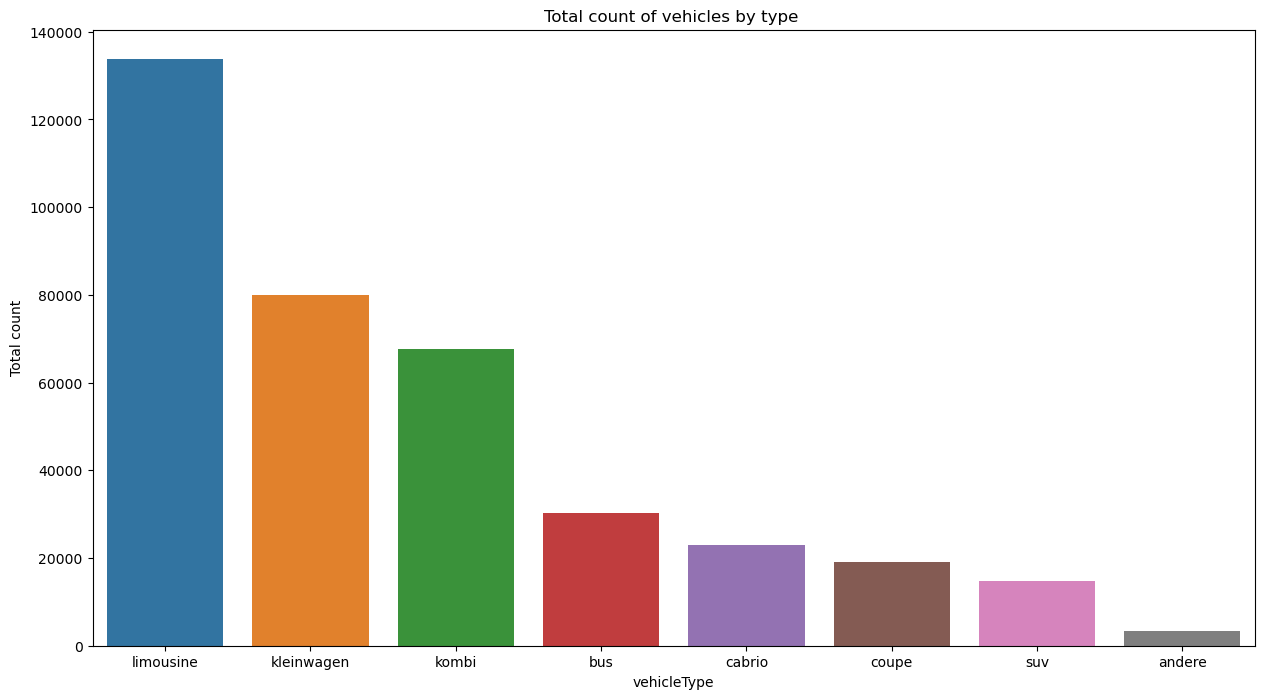

In [12]:
ve_count = d["vechile_type"].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=ve_count.index , y=ve_count.values)
plt.title("Total count of vehicles by type ")
plt.xlabel("vehicleType")
plt.ylabel("Total count")
plt.show()

5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [13]:
d[['price','kilometer']].corr(method='spearman')

,price,kilometer
price,1.00000,-0.37305
kilometer,-0.37305,1.00000
